<a href="https://colab.research.google.com/github/kimm55263/class2021Fall/blob/main/nlp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

In [1]:
import nltk

In [2]:
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
text.split()

In [4]:
' '.join(text.split())

'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. The ones who see things differently — they’re not fond of rules. You can quote them, disagree with them, glorify or vilify them, but the only thing you can’t do is ignore them because they change things. They push the human race forward, and while some may see them as the crazy ones, we see genius, because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [5]:
from nltk.tokenize import word_tokenize # 단어, comma, punctuation 모두 토큰으로 받음
nltk.download('punkt') 
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
words # 위에 스트링은 줄글 하나, 아래는 모두 쪼개서 들어와 있음

In [9]:
from nltk.tokenize import RegexpTokenizer # regular expression을 기반으로 함, 일종의 룰임
retokenize = RegexpTokenizer("[\w]+") # 이 룰이 [\w] - word
words = retokenize.tokenize(text)

In [ ]:
words # 아까와 달리 단어만 들어가 있음

### Normalization  
Stemming: am → am, the going → the go, having → hav  
Lemmatization: am → be, the going → the going, having → have

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words] # 위에서는 각각의 string이 들어있는 리스트 words = retokenize.tokenize(text)

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer # 원형, went -> go
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword

In [10]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')] # 각각의 개별 단어가 stopwords에 들어있지 않으면 빼라
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Here', 's', 'to', 'the', 'crazy', 'ones', 'the', 'misfits', 'the', 'rebels', 'the', 'troublemakers', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', 'The', 'ones', 'who', 'see', 'things', 'differently', 'they', 're', 'not', 'fond', 'of', 'rules', 'You', 'can', 'quote', 'them', 'disagree', 'with', 'them', 'glorify', 'or', 'vilify', 'them', 'but', 'the', 'only', 'thing', 'you', 'can', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', 'They', 'push', 'the', 'human', 'race', 'forward', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', 'we', 'see', 'genius', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', 'are', 'the', 'ones', 'who', 'do']
['Here', 'crazy', 'ones', 'misfits', 'rebels', 'troublemakers', 'round', 'pegs', 'square', 'holes', 'Th

### Collocation, Concordance

In [20]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text) # 위에서 만든 걸 그대로 사용함

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [13]:
len(words)

161983

In [12]:
text

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

In [18]:
nltk.Text(words).collocations()

Mrs Weston; Frank Churchill; Miss Woodhouse; Mrs Elton; Miss Bates;
Jane Fairfax; Miss Fairfax; every thing; young man; every body; great
deal; Mrs Goddard; dare say; Maple Grove; John Knightley; Miss Taylor;
Miss Smith; Robert Martin; Colonel Campbell; Box Hill


In [19]:
nltk.Text(words).concordance('Emma', 79, 10)

Displaying 10 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this


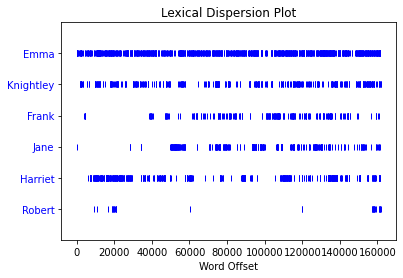

In [21]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])
# 이 소설 속에서 단어들이 얼마나 퍼져있는가? 
# x축은 words의 list 19만정도
# Emma는 계속 나옴, Robert도 초반에 반짝했다가 막판에 조금 나옴
# Data anlaysis

In [22]:
nltk.Text(words).similar("Emma")
# Emma와 similar하게 쓰이는 것들

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [25]:
nltk.Text(words).common_contexts(["Emma", "her"])
# emma하고 she하고 비슷한 context에서 나오면 찾아줘라

of_s between_and do_good for_that from_she for_i see_in of_as to_not
to_than at_and in_s for_mr to_i to_and to_but to_on like_s for_to
to_he


### Frequency distribution, Frequency plot

In [36]:
fd = nltk.FreqDist(words).most_common(20)
fd
# list words를 넣고, most common 없이도 사용된 단어가 모두 나옴 근데, 등장하는 단어대로 not sorted

[(('to', 5183), 1),
 (('the', 4844), 1),
 (('and', 4672), 1),
 (('of', 4279), 1),
 (('I', 3178), 1),
 (('a', 3004), 1),
 (('was', 2385), 1),
 (('her', 2381), 1),
 (('it', 2128), 1),
 (('in', 2118), 1),
 (('not', 2101), 1),
 (('be', 1970), 1),
 (('she', 1778), 1),
 (('that', 1730), 1),
 (('you', 1677), 1),
 (('had', 1606), 1),
 (('as', 1387), 1),
 (('he', 1365), 1),
 (('for', 1321), 1),
 (('have', 1301), 1)]

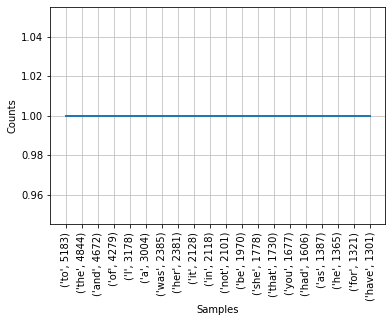

In [37]:
nltk.Text(words).plot(20)

### Dictionary

In [44]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [45]:
len(nltk.corpus.words.words('en'))

235886

### Regular expression

In [46]:
import re

In [47]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

'       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures\n\n.\t        Wildcard, matches any character\n^abc\t    Matches some pattern abc at the start of a string\nabc$\t    Matches some pattern abc at the end of a string\n[abc]\t    Matches one of a set of characters\n[^abc]    Matches anything but a set of characters\n[A-Z0-9]\tMatches one of a range of characters\ned|ing|s\tMatches one of the specified strings (disjunction)\n*\t        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)\n+\t        One or more of previous item, e.g. a+, [a-z]+\n?\t        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?\n{n}\t      Exactly n repeats where n is a non-negative integer\n{n,}\t    At least n repeats\n{,n}\t    No more than n repeats\n{m,n}\t    At least m and no more than n repeats\na(b|c)+\t  Parentheses that indicate the scope of the operators\n(...)     Matches whatever regular expression is inside the pare

In [61]:
re.findall('[^a-z]', 'C0nsidered seed')
# ed$ - 규칙, considered-대상, considered라는 string에서 ed를 찾아라
# string의 가장 마지막에서-$ ed를 찾아라, 그러면 하나만 찾아지게 됨
# [a-z] 철자만 찾아라 space bar not included
# [a-z\s] tab, new line, return와 같은 character를 찾아줌

['C', '0', ' ']

In [62]:
re.findall('ed|ing|s', 'C0nsidered seed')
# | 혹은이라는 뜻, ed, ing, s를 찾아라
# 접사로서의 이야기는? 
# ed가 끝나면 space가 옴

['s', 'ed', 's', 'ed']

In [65]:
# re.findall('[s]*', 'C0nssidered seed')
# s가 0개 이상 들어간 것을 찾아라
# 0개인 것도 찾아준 것

re.findall('[s]?', 'C0nssidered seed')

['', '', '', 's', 's', '', '', '', '', '', '', '', 's', '', '', '', '']

In [71]:
if re.search('ep$', 'baked'):
  print('yes')
else:
  print('no')

no


In [80]:
engdict = nltk.corpus.words.words('en')

# result = [w for w in engdict if re.search('ed$', w)]
# 리스트로 된 사전이 있음, ed로 끝나는 단어를 모두 가지고 오라; 
# w for w in engdict 처음부터 W받아 들어가는데, if절에 개별 string의 단어가 들어가는데,
# string이 ed로 끝나는 것을 찾아라, 그 단어 통으로 list를 다시 만들어라

# result = [w for w in engdict if re.search('^..j..t..$', w)]
# 시작하는 게 뭐뭐 있고 j 나오고 뭐뭐 있고 t있고 뭐뭐 나오고 끝나는 모든 단어
# 글자는 총 8개가 되면서

result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]

# result = [w for w in engdict if re.search('^[ah]+$', w)
print(result[:10])

['gold', 'golf', 'hold', 'hole']


In [83]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

# result = [w for w in wsj if re.search('(ed|ing)$', w)]

# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# 0-9에 해당되는 숫자가 하나 나오고, \.period가 나오고 숫자가 나오는 단어를 찾아라

# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]

# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# 숫자가 4개 나옴

# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# 숫자가 하나 이상 나오고, dash있고, 글자가 나오는 것

# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]
# 소문자가 5개 이상 나오고, dash 나오고 ... 

result = sorted(set(result)) # 리스크를 먼더 set로 바꾸고, 그걸 sort함
print(result[:10])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
['C$', 'US$']


### Extract information (pos tag, named entity)

In [ ]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [ ]:
'''
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
'''

In [ ]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

### Wordcloud

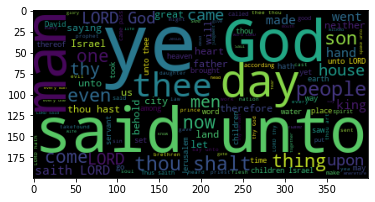

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

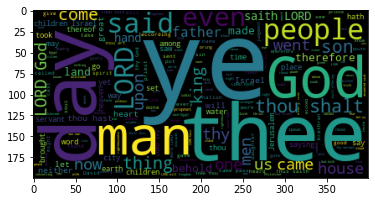

In [ ]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)